* 시계열 형태
    - 불규칙 변동 : 제거, 완화의 필요성이 있다 --> Smoothing Methods
    - 추세 변동 : 추세를 없애주는 것이 좋다(평균,분산을 일정하게 한다)
    - 계절 변동 : 계절적 요인을 없애주는 것이 좋다(평균, 분산을 일정하게 한다)
    - 순환 변동 : 주기성있는 것은 제거할 필요가 없다 
        - time lag가 일정하지 않는 것들(=주기성을 갖는 것), 계절성과 구분해야 됨 !!!
        - 추세가 있어도, time lag가 다르면 순환성이 있다


> 평활화 기법(Smoothing Methods)


    - 불규칙성을 없애는 방법    
    1. 이동평균법
    2. 지수평활법

> 이동평균법(moving average method)

    - n (n 기간 동안) 의 평균을 구해서 연결하는 방법
    - 전체 관측치의 개수가 줄어든다
    - 평균값으로 연결하므로, 데이터가 파악할 수 있을 정도로 나타날것이라고 생각한다
    
    * SMA(simple moving average)
        - 단순 이동 평균은 가장 일반적인 평균 유형
        - pandas의 Series.rolling(window=20) 메서드 이용
        - window = 구간 개수
        - 슬라이딩 넓이의 값이 클수록 데이터가 평활해지만, 값이 크면 정확도가 떨어질 수 있다

    * EMA(Exponential Moving Average)
        - 가까운 데이터에 가중치를 더 많이 준다
        - 멀어진 데이터에 가중치를 덜 준다
        - pandas의 Series.ewn() 메서드를 이용
    
    * CMA(Cumulative Moving Average)
        - 누적 이동 평균
        - 가중치가 없는 펴육ㄴ이다
        - pandas의 Series.expanding() 매서드를 이용


### SMA(simple moning aveage)

<Axes: xlabel='Date'>

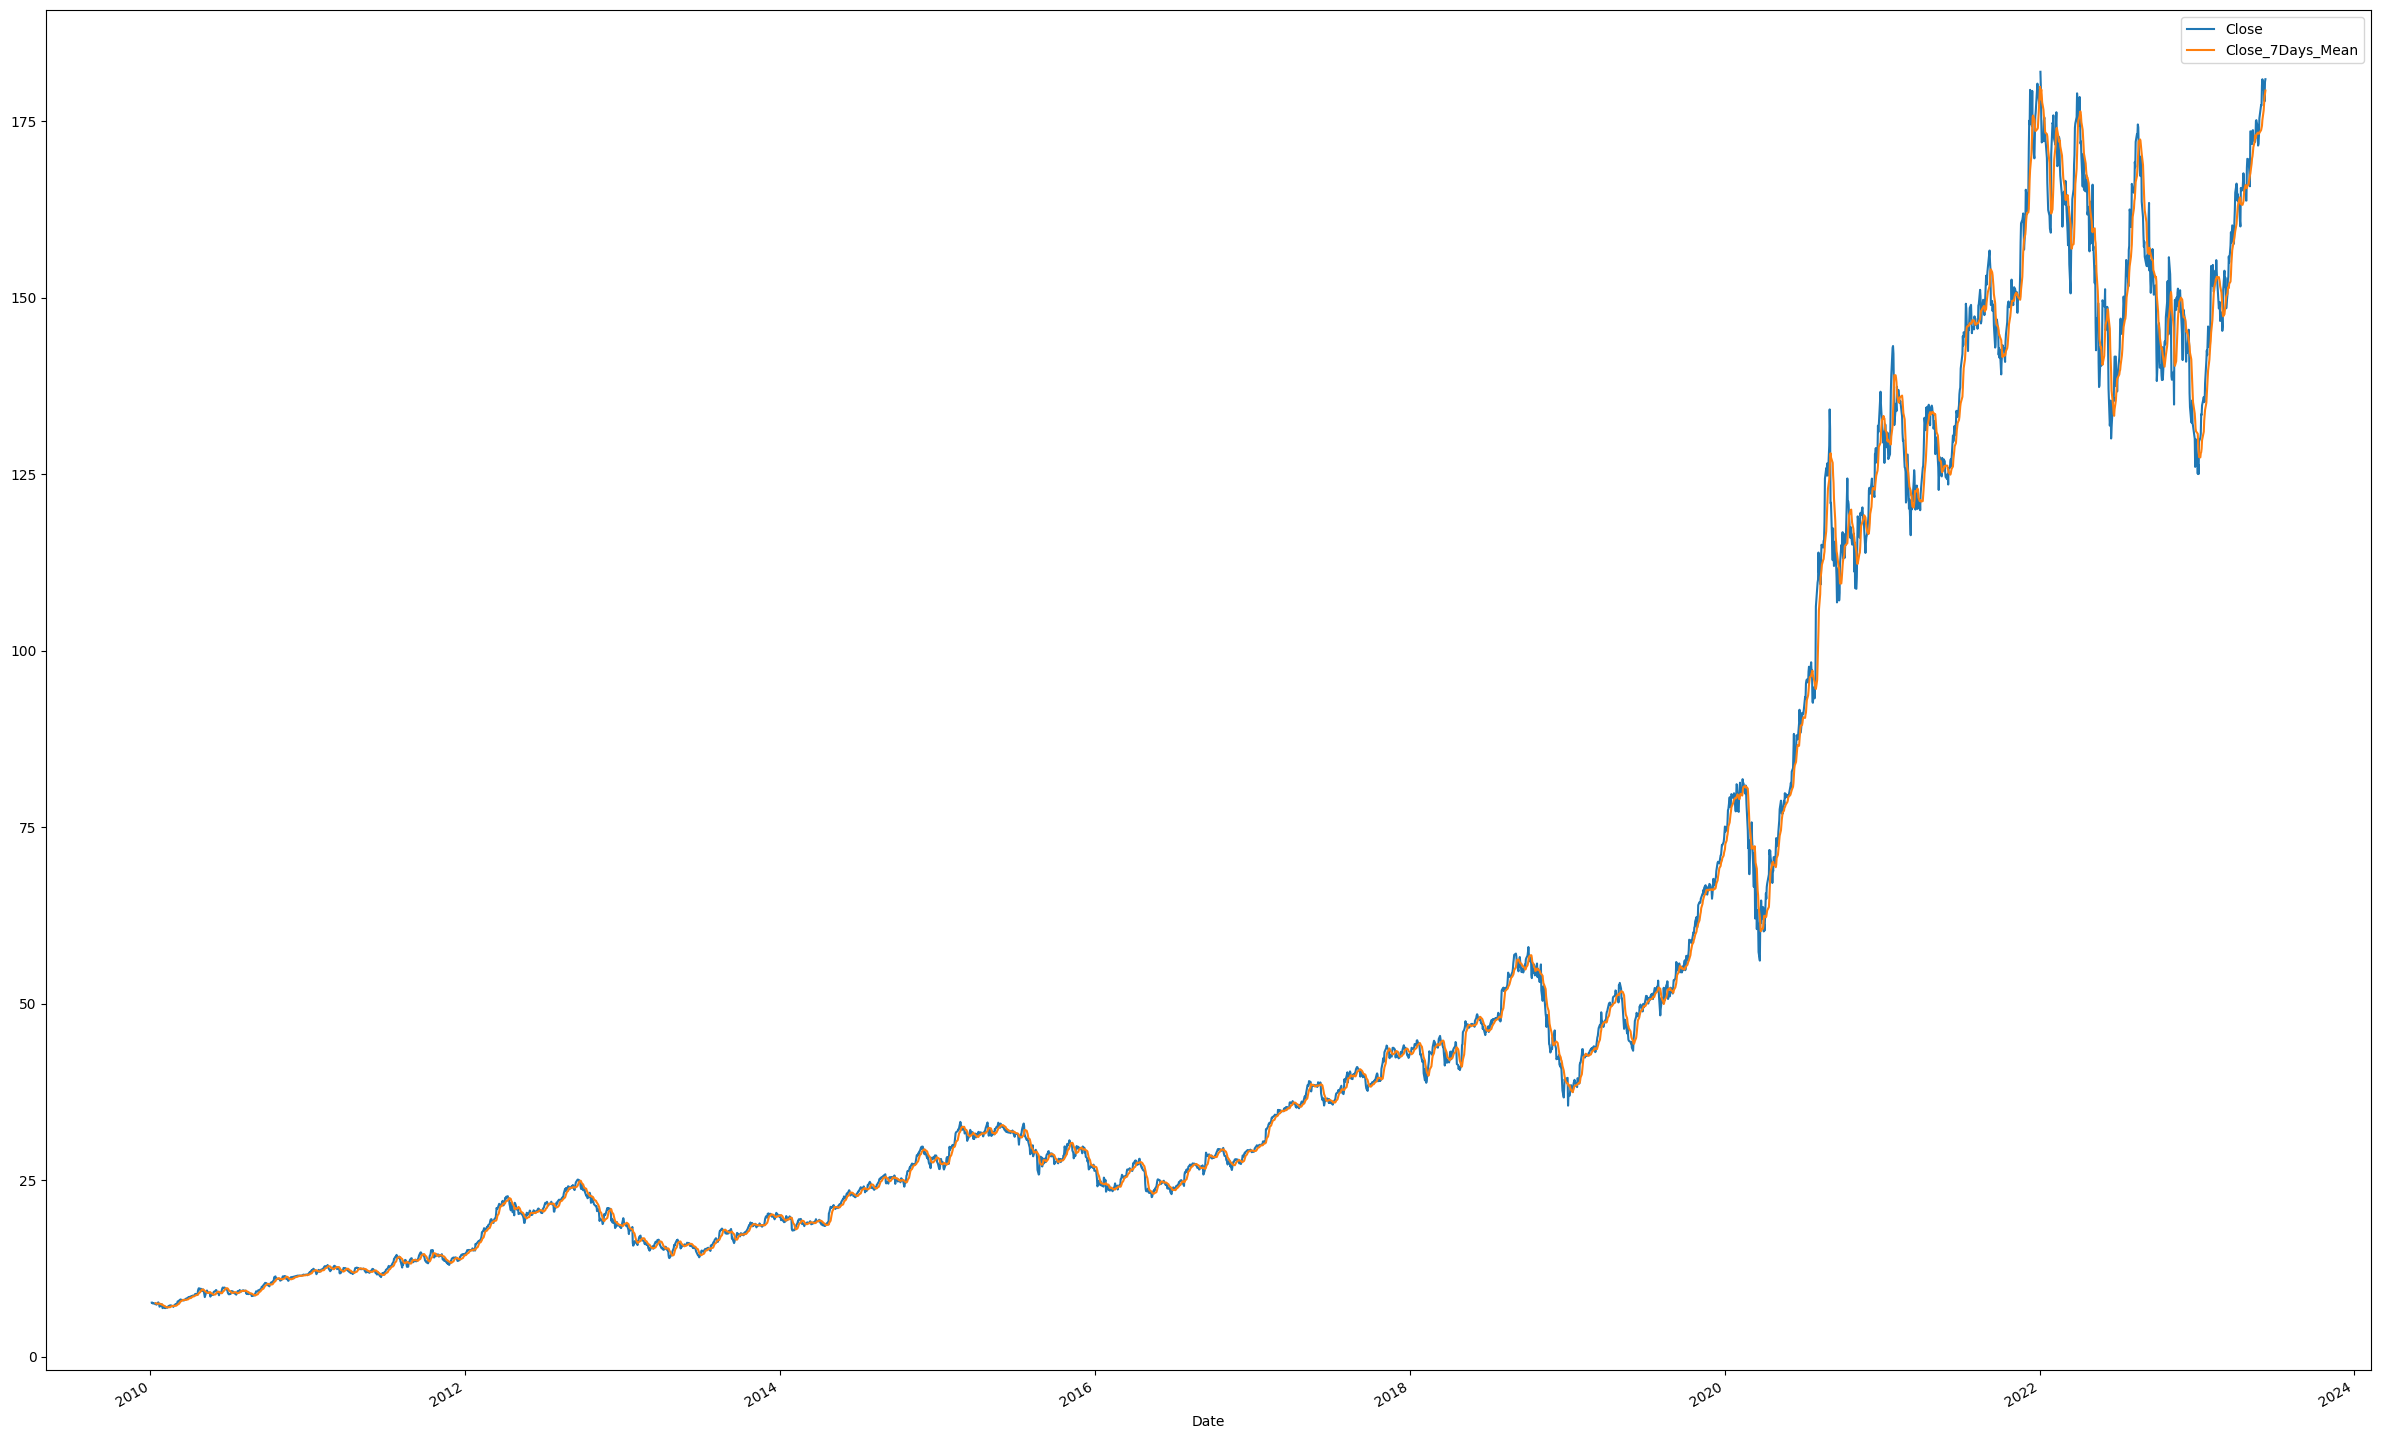

In [8]:
import FinanceDataReader as fdr
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
import pandas as pd

# 2010년 ~ 현재까지의 애플 주가를 데이터 프레임으로 불러오기
df_apple = fdr.DataReader("AAPL", start = "2010")

# 가장 마지막(최신)의 10일치 주가 출력
# df_apple.tail(10)

# df_apple[["Close"]].plot(figsize=(20, 10))
# df_apple["Close_7Days_Mean"] = df_apple["Close"].rolling(7).mean()
# plt.title("Close Price for Apple")

# 7일전 평균값 그래프 + 종가 그래프
last_day = datetime(2022, 1, 2)
df_apple.loc[last_day, "Close"] = np.nan
# shift(1): 한칸 다음으로 이동
df_apple["Close_7Days_Mean"] = df_apple["Close"].rolling(7).mean().shift(1)
df_apple[["Close", "Close_7Days_Mean"]].plot(figsize=(30, 20))


<Axes: xlabel='Date'>

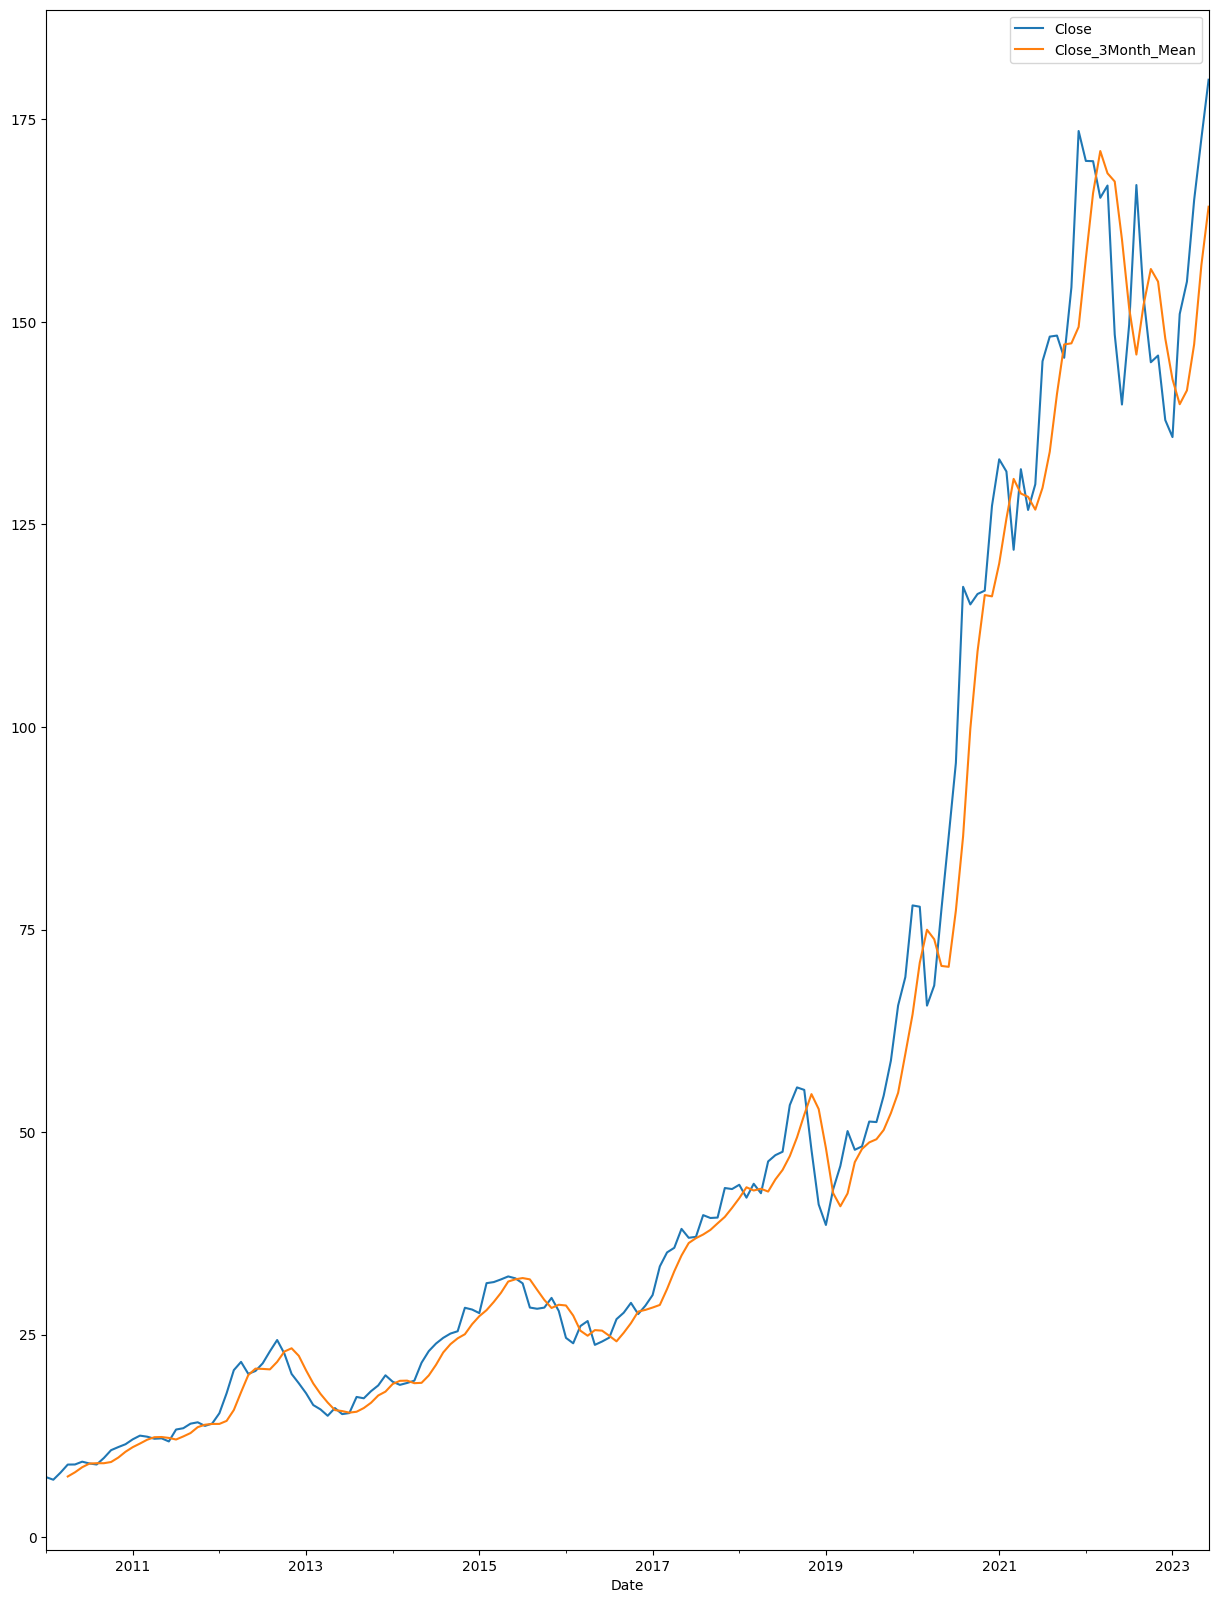

In [12]:
# 월단위로 주식 가격의 평균을 샘플링
df_apple_monthly = df_apple.resample(rule="M").mean()
# 마지막 컬럼 (Close_7Days_Mean) 제외
df_apple_monthly = df_apple_monthly.iloc[:, :-1]
df_apple_monthly[["Close_3Month_Mean"]] = df_apple_monthly[["Close"]].rolling(3).mean().shift(1)
df_apple_monthly[["Close", "Close_3Month_Mean"]].plot(figsize=(15, 20))

### EMA(Exponential Moving Average)
    - df.ewm(com=None, span=None, halflife=None, alpha=None, min_periods=0, adjust=True, ignore_na=False, axis=0, times=None, method='single')


    - 기본적으로 가중치를 결정하는 요소는 alpha 로 표기되는 평활계수(감쇠계수) 입니다. com / span / halflife를 통해 자동 계산하도록 하거나, alpha를 통해 직접 설정할 수 있습니다.
    - com : 질량중심 값으로 평활계수를 계산합니다. [ a = 1(1+com) ]
    - span : 계산 기간으로 평활계수를 계산합니다. [ a = 2/(span+1) ]
    - halflife : 반감기를 이용하여 평활계수를 계산합니다. [ a= e^(-ln(2) / halflife) ]
    - alpha : 평활계수를 직접 입력합니다. [ 0 < a ≤ 1 ]
    - min_periods : 계산을위한 최소 기간입니다.
    - adjust : 상대적 가중치의 불균형을 해소하기위해 조정계수로 나눌지의 여부입니다. 대체로 값이 많을수록 adjust를 하는것이 유리합니다.
    - ignore_na : 가중치를 계산할때 누락값을 무시할지 여부 입니다.

<Axes: xlabel='Date'>

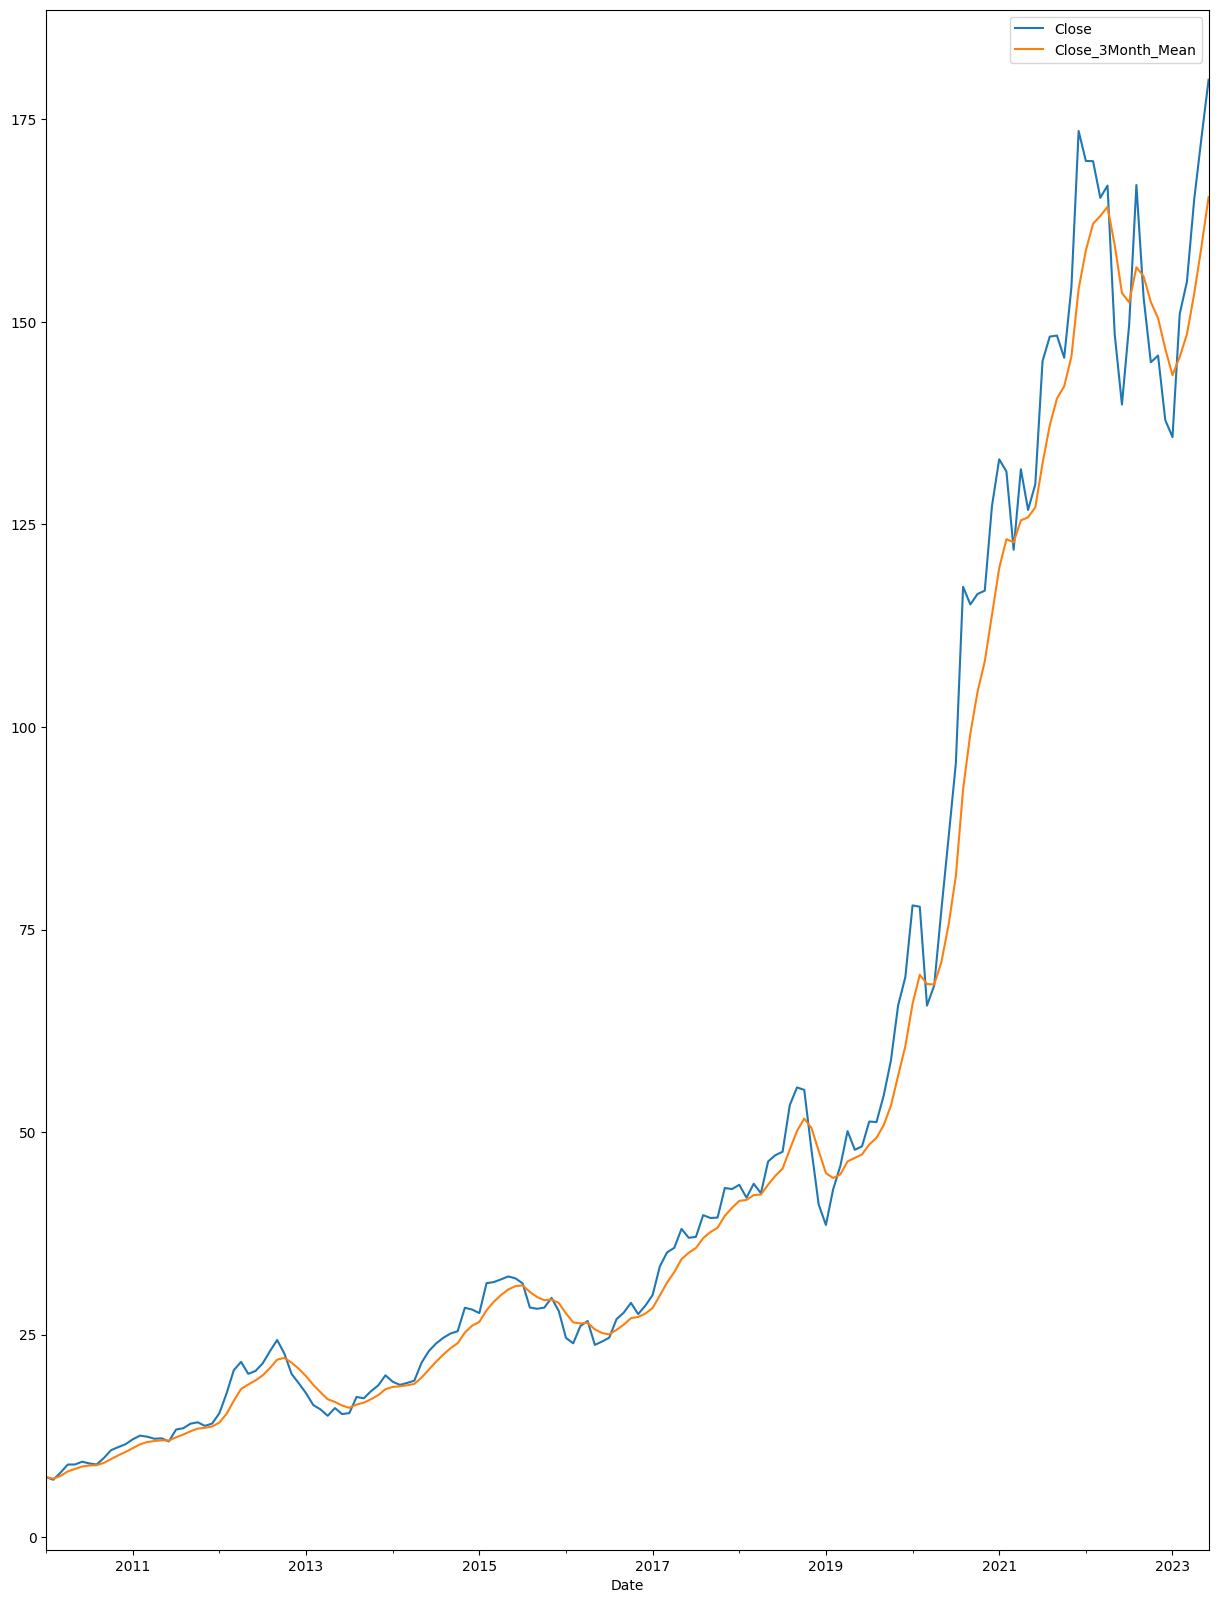

In [20]:
df_apple = fdr.DataReader("AAPL", start = "2010")
# 월단위로 주식 가격의 평균을 샘플링
df_apple_monthly = df_apple.resample(rule="M").mean()
df_apple_monthly
df_apple_monthly[["Close_3Month_Mean"]] = df_apple_monthly[["Close"]].ewm(alpha=0.3).mean()
df_apple_monthly
df_apple_monthly[["Close", "Close_3Month_Mean"]].plot(figsize=(15, 20))


## 정상성과 차분

### 정상성(stationarity)
    - 정태성, 늘 한결같은 성질을 의미
    - 시계열에서 정상성이 있다는 것  --> 추세,동향이 없는 상태
    - 시계열의 평균이 시간 축에 평행
    - 정상성은 시계형 자료가 시계열 모형으로 적합하기 위한 전제 조건
    - 추세,동향이 있는 상태로는 모형을 만들 수 없다---> 차분(differencing)을 이용

- stationary process, non-stationary process

### 차분(differencing)
- 현시점 자료에서 전 시점 자료를 빼는 것을 의미
- python에서 diff()매소드를 이용한다
- dropna()도 같이 이용
- 일반 차분(regular difference) : 바로 전 시점의 자료를 빼는 것
- 계절 차분(seasonal difference) : 여러 시점 전의 자료를 빼는 것

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
## getting drug sales dataset

df=pd.read_csv('./a10.csv',parse_dates=['date'],index_col='date')
df.head()

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869


1. 분산이 시간의 흐름에 따라 증가한다
2. 추세(trend)가 존재한다
3. 1년 주기의 계절성(seasonality)가 존재
4. 비정상확률 과정(non-stationary process) : 추세,계절성 삭제.. 차분이용

* stationary process로 바꾸기
    1. log transformation 으로 분산 안정화
    2. differencing(차분)으로 추세 제거
    3. seasonal differencing(계절 차분)을 이용해서 계절성 제거를 모두 마쳐서 정상 시계열(stationary process)로 변환

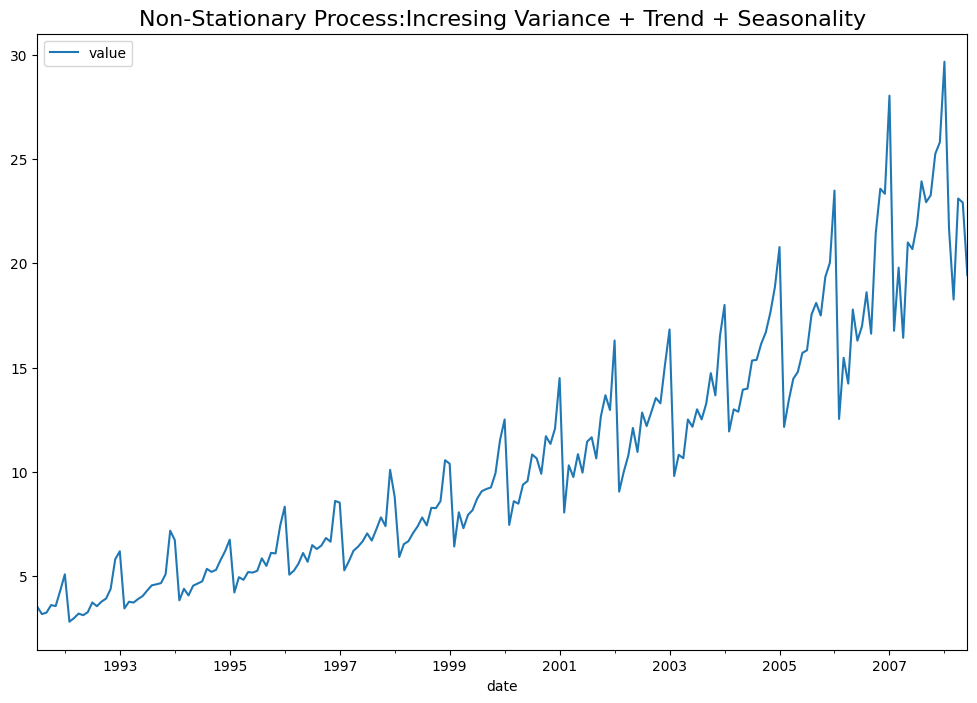

In [26]:
df.plot(figsize=[12,8])
plt.title('Non-Stationary Process:Incresing Variance + Trend + Seasonality',fontsize=16)
plt.show()

In [25]:
## Variance Stabilizing Transformation (VST) by Taking Logarithm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df_vst = np.log(df.value)
df_vst.head()

date
1991-07-01    1.260332
1991-08-01    1.157161
1991-09-01    1.179338
1991-10-01    1.283986
1991-11-01    1.271408
Name: value, dtype: float64

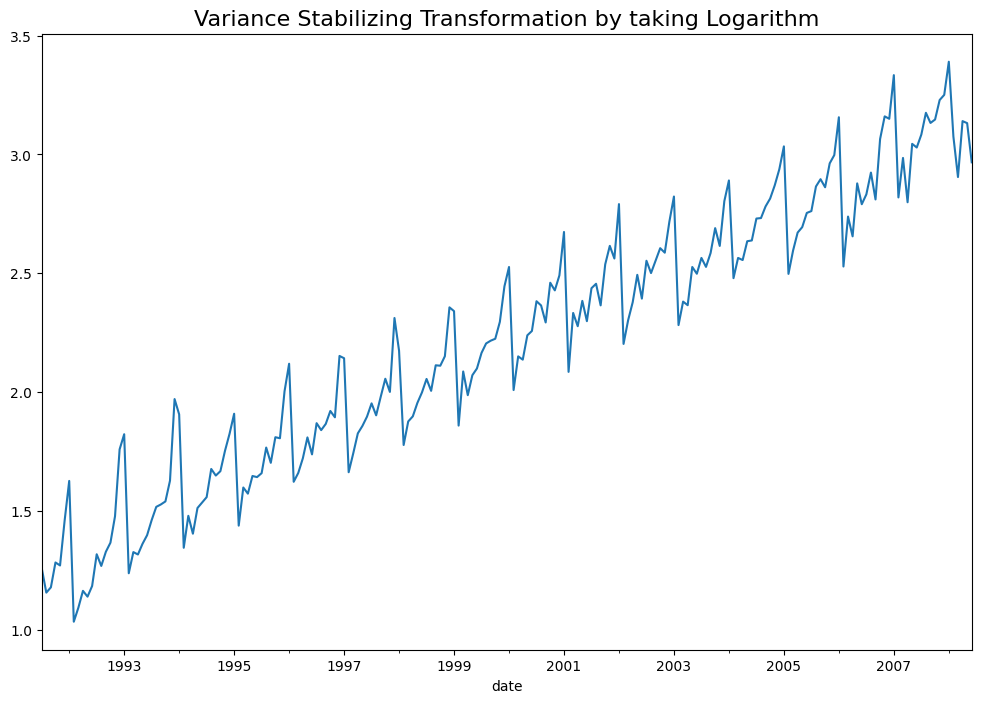

In [27]:
## plotting
## 로그로 변환!!!!

df_vst.plot(figsize=(12,8))
plt.title("Variance Stabilizing Transformation by taking Logarithm", fontsize=16)
plt.show()

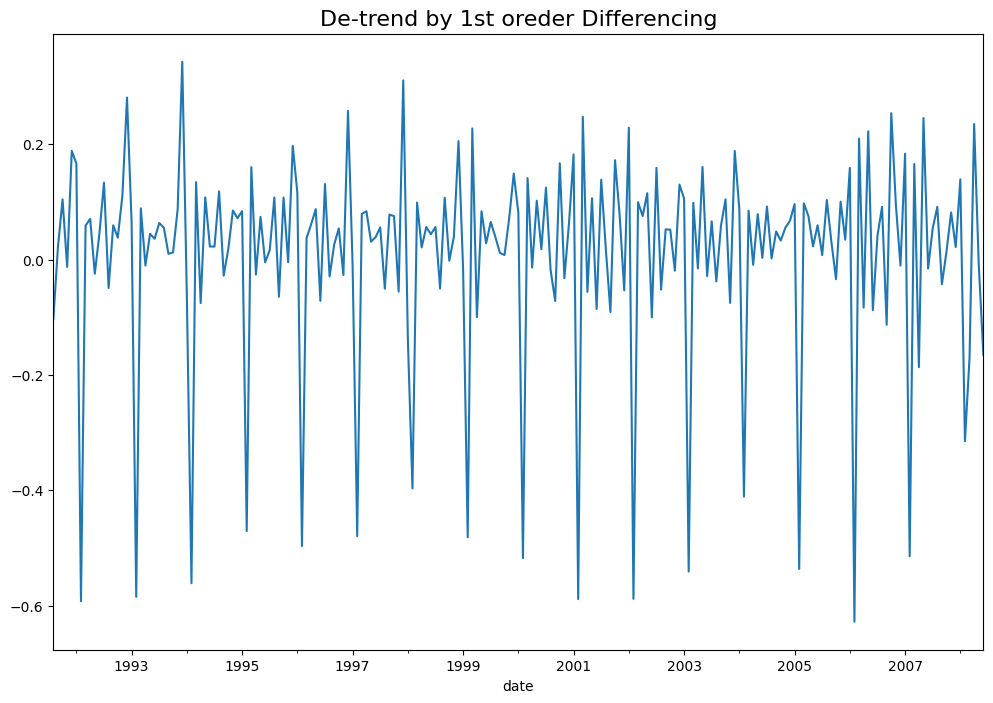

In [28]:
## De-trend by Differencing
## 하루 전 날 데이터 빼기

df_vst_diff1 = df_vst.diff(1).dropna()
df_vst_diff1
plt.figure(figsize=(12,8))
df_vst_diff1.plot()
plt.title("De-trend by 1st oreder Differencing",fontsize=16)
plt.show()

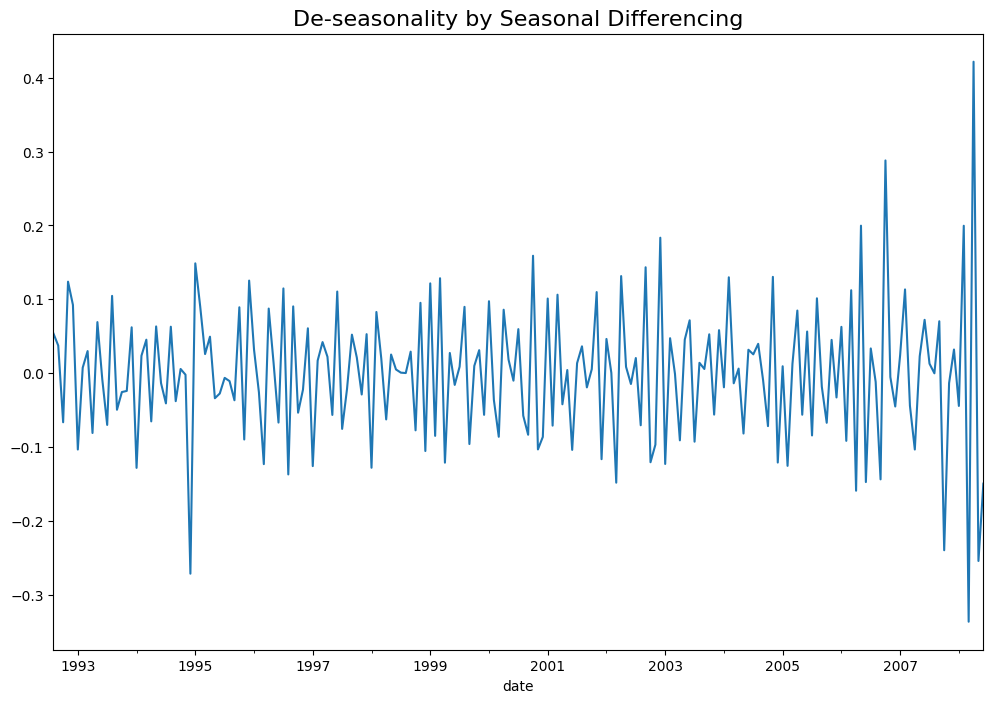

In [29]:
## Stationary Process:De -seasonaliry by Seasonal Differencing
## 12전으로 함수 처분
df_vst_diff1_diff12 = df_vst_diff1.diff(12).dropna()
## plotting
plt.figure(figsize=(12,8))
df_vst_diff1_diff12.plot()
plt.title("De-seasonality by Seasonal Differencing", fontsize=16)
plt.show()

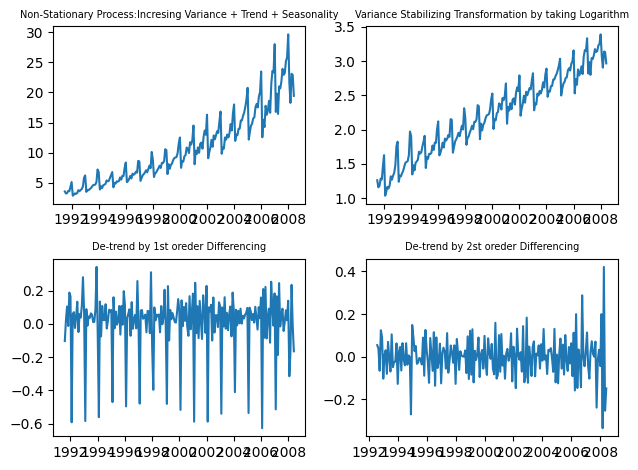

In [39]:
fig, axes = plt.subplots(2, 2)

axes[0, 0].plot(df.index, df.values)
axes[0, 0].set_title('Non-Stationary Process:Incresing Variance + Trend + Seasonality', fontsize=7)

axes[0, 1].plot(df_vst.index, df_vst.values)
axes[0, 1].set_title("Variance Stabilizing Transformation by taking Logarithm", fontsize=7)

axes[1, 0].plot(df_vst_diff1.index, df_vst_diff1.values)
axes[1, 0].set_title("De-trend by 1st oreder Differencing", fontsize=7)

axes[1, 1].plot(df_vst_diff1_diff12.index, df_vst_diff1_diff12.values)
axes[1, 1].set_title("De-trend by 2st oreder Differencing", fontsize=7)

plt.tight_layout()
plt.show()